In [ ]:
import numpy as np
import math

# Spiral Matrix

In [ ]:
# SIMPLE FOR LOOP METHOD
def spiral_matrix_loop(arr):
  res = []
  rStart = 0
  rEnd = len(arr)-1
  cStart = 0
  cEnd = len(arr[0])-1

  while (rStart <= rEnd) and (cStart <= cEnd):
    # Top Left->Right
    for i in range(cStart,cEnd+1):
      res.append(arr[rStart][i])
    rStart += 1

    # Right Top->Botton
    for i in range(rStart,rEnd+1):
      res.append(arr[i][cEnd])
    cEnd -= 1

    # Bottom Left<-Right
    if rStart <= rEnd+1: # check atleast 1 row should be there
      for i in reversed(range(cStart, cEnd+1)):
        res.append(arr[rEnd][i])
    rEnd -= 1

    # Left Bottom->Top
    if cStart <= cEnd+1: # check atleast one column is present
      for i in reversed(range(rStart,rEnd+1)):
        res.append(arr[i][cStart])
    cStart += 1


  return res

In [ ]:
# VISITED AND DIRECTION METHOD
# idea -> there are 4 directions Top L->R, Right T->B, Bottom R->L, Left B->T
# and you change these directions cyclically whenever you face boundary

# So start with L->R, if you face boundary change direction to T->B and so on

def spiral_matrix_vis(arr):
  # directions = [Top L->R, Right T->B, Bottom R->L, Left B->T]
  rows = len(arr)
  cols = len(arr[0])
  vis = [[False for x in range(cols)] for x in range(rows)]
  i = 0
  j = 0
  res = []

  directions = [(0,1), (1,0), (0,-1), (-1, 0)]
  directionIndex = 0

  for _ in range(rows*cols):   
    res.append(arr[i][j])
    vis[i][j] = True
      
    # Calculate next step acc to current direction
    nextI = i + directions[directionIndex][0]
    nextJ = j + directions[directionIndex][1]

    # if next Step if valid you can move
    if nextI>=0 and nextJ>=0 and nextI<rows and nextJ<cols and not vis[nextI][nextJ]:
      i = nextI
      j = nextJ
    else: # if next step is not valid change the diretion
      directionIndex = (directionIndex+1) % 4
      i += directions[directionIndex][0]
      j += directions[directionIndex][1]

  return res


In [ ]:
arr = [[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]]
print(spiral_matrix_loop(arr))
print(spiral_matrix_vis(arr))

[1, 2, 3, 4, 8, 12, 16, 15, 14, 13, 9, 5, 6, 7, 11, 10]
[1, 2, 3, 4, 8, 12, 16, 15, 14, 13, 9, 5, 6, 7, 11, 10]


 # Leader in the array

 Leader is element if
 1. All elements on its left are smaller
 2. All elements on the right are larger than it

In [ ]:
def getLeader(arr):
  # approach from right to left
  leader = arr[-1]

  for x in reversed(arr):
    leader = max(leader,x)

  return leader

In [ ]:
getLeader([1,2,10,15,20,6])

20

# Trapping rain water
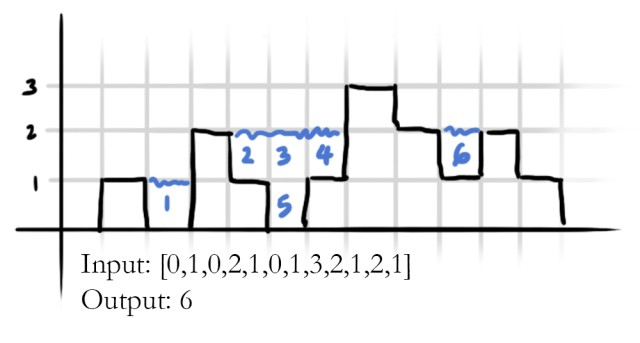

In [ ]:
# IDEA :
# Water trapped by tower(i) = min(highest tower on right,highest tower on left) - height of tower i

In [ ]:
def getTrappedWater(arr):
  n = len(arr)
  res = [0]*n

  # Left and right max arrays
  leftMax = []
  rightMax = []

  maxEle = 0
  for x in arr:
    maxEle = max(x,maxEle)
    leftMax.append(maxEle)
  maxEle = 0
  for x in reversed(arr):
    maxEle = max(x,maxEle)
    rightMax.append(maxEle)

  rightMax = sorted(rightMax,reverse=True)

  print(leftMax)
  print(rightMax)
  

  # calculate trapped water
  for i in range(1,n-1): # first and last tower cant bound water individually
    res[i] = min(leftMax[i],rightMax[i]) - arr[i]
    if res[i] < 0:
      res[i] = 0

  return res,sum(res)



In [ ]:
arr = [0,1,0,2,1,0,1,3,2,1,2,1]
rainArr, result = getTrappedWater(arr)

print(rainArr,result)

[0, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3]
[3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1]
[0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 0, 0] 6


# Is Subset Sum
Given a set of non-negative integers, and a value sum, determine if there is a subset of the given set with sum equal to given sum

In [ ]:
def isSubsetSum(arr,n,sum):
  if sum == 0:
    return True
  elif n == 0:
    return False
  elif arr[n-1] > sum:  # cur ele > remaming sum
    return isSubsetSum(arr,n-1,sum)
  else: # select the curr ele OR ignore the current ele
    return isSubsetSum(arr, n-1, sum-arr[n-1]) or isSubsetSum(arr,n-1,sum)

In [ ]:
arr = [3, 34, 4, 12, 5, 2]
res = isSubsetSum(arr,6,9)
print(res)

arr = [3, 34, 4, 12, 5, 2]
res = isSubsetSum(arr,6,190)
print(res)

True
False


# Count Subset Sum (Bounded Knapsack)

Given an array arr[] of length N and an integer X, the task is to find the number of subsets with sum equal to X.

## Recursive Approach

In [ ]:
def crs(arr, n, sum):
  if sum == 0:
    return 1
  if n == 0:
    return 0

  if arr[n-1] > sum:
    return crs(arr, n-1 , sum)
  else:
    return crs(arr, n-1, sum) + crs(arr, n-1, sum-arr[n-1])

In [ ]:
arr = [1, 2, 3, 3]
X = 6
print(crs(arr, len(arr), 6))

3


## DP Approach

In [ ]:
def dp_crs(arr, sum):
  n = len(arr)
  
  # size of dp[][] = (n+1,sum+1)
  dp = [[0 for _ in range(sum+1)] for _ in range(n+1)]

  # initialize base condition
  for i in range(sum+1): # first row (i.e for n==0 sum cant be formed)
    dp[0][i] = 0

  for i in range(n+1): # first col : for sum=0, we can form by not choosing any coins
    dp[i][0] = 1

  for i in range(1,n+1):
    for j in range(1,sum+1):
      if arr[i-1] > j:
        dp[i][j] = dp[i-1][j]
      else:
        dp[i][j] = dp[i-1][j] + dp[i-1][j-arr[i-1]]

  print(*dp, sep="\n")
  return dp[n][sum]



In [ ]:
arr = [1, 2, 3, 3]
X = 6
print(dp_crs(arr, 6))

[1, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0]
[1, 1, 1, 2, 1, 1, 1]
[1, 1, 1, 3, 2, 2, 3]
3


# No of ways to make Coin Change ( Unbounded Knapsack)
Given a value N, if we want to make change for N cents, and we have infinite supply of each of S = { S1, S2, .. , Sm} valued coins, how many ways can we make the change?

## Recursive

In [ ]:
def coinChange(coins, n, sum):
  if sum == 0:
    return 1
  if n == 0:
    return 0;

  if coins[n-1] > sum: # you cant pick the coin
    return coinChange(coins,n-1,sum)
  else: # you can either ignore the coin or pick it infinitely
    return coinChange(coins, n-1, sum) + coinChange(coins, n, sum-coins[n-1])

In [ ]:
coins = [2, 5, 3, 6]
print(coinChange(coins, len(coins), 10))

5


## DP based

In [ ]:
def coin_change_dp(coins, sum):
  n = len(coins)

  dp = [[0 for _ in range(sum+1)] for _ in range(n+1)]

  for i in range(n+1):
    for j in range(sum+1):
      if sum == 0:
        dp[i][j] = 1
      elif i == 0:
        dp[i][j] = 0
      elif coins[i-1] > j: # ignore the coin
        dp[i][j] = dp[i-1][j]
      else:     # unbounded knapsack
        dp[i][j] = dp[i-1][j] + dp[i][j - coins[i-1]] 
  return dp[n][sum]

In [ ]:
coins = [2, 5, 3, 6]
print(coinChange(coins, len(coins), 10))

5


# Minimum number of coins
Given a value V, if we want to make change for V cents, and we have infinite supply of each of C = { C1, C2, .. , Cm} valued coins, what is the minimum number of coins to make the change? If it’s not possible to make change, print -1.

## Optimal Approach

In [ ]:
def getMinCoins(coins, sum):
  n = len(coins)

  # dp[i] = no of coins needed to make sum of 'i'
  dp = [float('inf') for _ in range(sum+1)]

  dp[0] = 0 # base case : for sum=0 you need 0 coins

  for i in range(1,sum+1):
    # check for all coins less than coins[i] that you can pick
    for j in range(n):
      if coins[j] <= i:
        rem_sum_coins = dp[i-coins[j]]
        if rem_sum_coins != float('inf') and (1+rem_sum_coins) < dp[i]:
          dp[i] = 1+rem_sum_coins

  print(dp)
  return -1 if dp[sum] == float('inf') else dp[sum]

In [ ]:
coins = [9, 6, 5, 1]
sum = 11

print(getMinCoins(coins,sum))

[0, 1, 2, 3, 4, 1, 1, 2, 3, 1, 2, 2]
2


## Unbounded Knapsack based Approach

In [ ]:
def minCoins(coins, sum):
  n = len(coins)
  dp = [[0]*(sum+1)]*(n+1)

  for i in range(n+1):  # i -> index of coin to be chosen
    for j in range(sum+1): # j -> current sum which needs to be made

      if j == 0: # to make sum=0 you need 0 coins (first column)
        dp[i][j] = 0
      elif i == 0: # to make sum with 0 coins you need infinite amt of coins
        dp[i][j] = float('inf')

      elif coins[i-1] > j:
        dp[i][j] = dp[i-1][j]
      else:   # you either ignore, or pick one coin and continue ***you can pick same coin again
        dp[i][j] = min(dp[i-1][j], 1+dp[i][j-coins[i-1]]) 
    

  return dp[n][sum]

In [ ]:
coins = [9, 6, 5, 1]
sum = 11

print(minCoins(coins,11))

2


# Binary Exponentitation

Find : $ base^{power} $ 
Steps:
1. res = 1
2. If power is odd? -> Make it even
  - res = res*base
  - $ base^{power} $ -> $ base^{power-1} $ 
3. If power is even?
  - $ base^{power} $ -> $ (base^{2})^{ power/2 } $

Continue till power = 0


In [ ]:
def exp(base,power):
  res = 1

  while power != 0:
    if power%2 == 0: #even
      base = base **2
      power = power/2
    else: # odd
      res = res*base
      power -= 1
  
  return res



In [ ]:
exp(12,78754)

6915940283410889006665230013342136567679693972643532819042254537421082001808951684838768833131088928015916821249359423185977687275596880602729947358063898686230374221249289719564294779632569343139803283648591643326669561485862420731905576436008522136076837143863172149058396553189483716780577078958709112211062105386770866065086113974524012281201205574409928850651112478763859205704673401440565496526579491624890282718697378071015517871940672988538521094432770180583021940436018213907880844670415336284588237162643904228955796736616423645634268972916747921525692328960099592540568788063087047553857524486356039204214878326452879367370222348978328472975090327750628596818412888224566233347570020102278828799878030539939907627630946826860529213162378294809376864352564138951888196809379717502336812920349328844912202184910830710122695736750513896309957492136261223051443492734664411672375308430586470665217329023254777535381101381894243506575543533976413724116396802937041462102710024660244203559083440

# Two Number Sum

In [ ]:
# return indices of the two elements
def twoSum(nums, target):
        res = [0,0]
        arr = {}
        
        for idx, x in enumerate(nums):
            q = target - x
            if q in arr:
                return [idx, arr[q]]
            else:
                arr[x] = idx
  

# Check if number is Perfect Square

In [11]:
def isPerfect(n):
  lo = 1
  hi = n
  itCount = 0

  while lo <= hi:
    itCount += 1
    mid = lo + ((hi-lo)//2)
    ele = mid**2

    if ele == n:
      print("Iterations: ", itCount)
      return True
    elif n > ele:
      lo = mid+1
    else:
      hi = mid-1
  
  print("Iterations: ", itCount)
  return False

In [21]:
%%time
isPerfect(58254548)

Iterations:  26
CPU times: user 971 µs, sys: 818 µs, total: 1.79 ms
Wall time: 1.72 ms


False

# New Problem